In [54]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import tensor as T

In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
import berp.generators.thresholded_recognition_simple as gen
import berp.models.reindexing_regression as rr

In [82]:
params = rr.ModelParameters(lambda_=T(1.),
                            confusion=gen.phoneme_confusion,
                            threshold=T(0.7),
                            a=T(0.4),
                            b=T(0.1),
                            coef=T([1., -1.]))

In [109]:
ds = gen.sample_dataset(params, num_words=10)

tensor([0.1768, 0.4907, 0.8902, 1.1121, 1.4807, 1.7807, 2.1101, 2.4596, 2.8009,
        3.1585])
tensor(4.5274)


In [110]:
ds.phoneme_onsets

tensor([[0.1768, 0.2402, 0.3146, 0.4053, 0.4766],
        [0.4907, 0.5481, 0.6095, 0.6637, 0.7457],
        [0.8902, 0.9634, 1.0488, 1.1454, 1.2448],
        [1.1121, 1.1631, 1.2117, 1.2622, 1.3161],
        [1.4807, 1.5740, 1.6237, 1.6688, 1.7543],
        [1.7807, 1.8679, 1.9210, 1.9662, 2.0629],
        [2.1101, 2.1795, 2.2407, 2.3123, 2.3961],
        [2.4596, 2.5155, 2.5800, 2.6506, 2.7287],
        [2.8009, 2.8818, 2.9379, 2.9950, 3.0687],
        [3.1585, 3.2170, 3.2721, 3.3712, 3.4274]])

In [111]:
rr.predictive_model(ds.p_word, ds.candidate_phonemes, confusion=ds.params.confusion, lambda_=ds.params.lambda_)

tensor([[0.0387, 0.5565, 0.9541, 0.9919, 0.9994],
        [0.0282, 0.3250, 0.9478, 0.9956, 0.9998],
        [0.3756, 0.7922, 0.9864, 0.9998, 1.0000],
        [0.8003, 0.9880, 0.9996, 0.9998, 1.0000],
        [0.9019, 0.9944, 0.9997, 1.0000, 1.0000],
        [0.8317, 0.9554, 0.9976, 1.0000, 1.0000],
        [0.1254, 0.6960, 0.9914, 0.9996, 1.0000],
        [0.7835, 0.9870, 0.9995, 0.9999, 1.0000],
        [0.0230, 0.1946, 0.7670, 0.9905, 0.9994],
        [0.3331, 0.9280, 0.9969, 0.9998, 0.9999]])

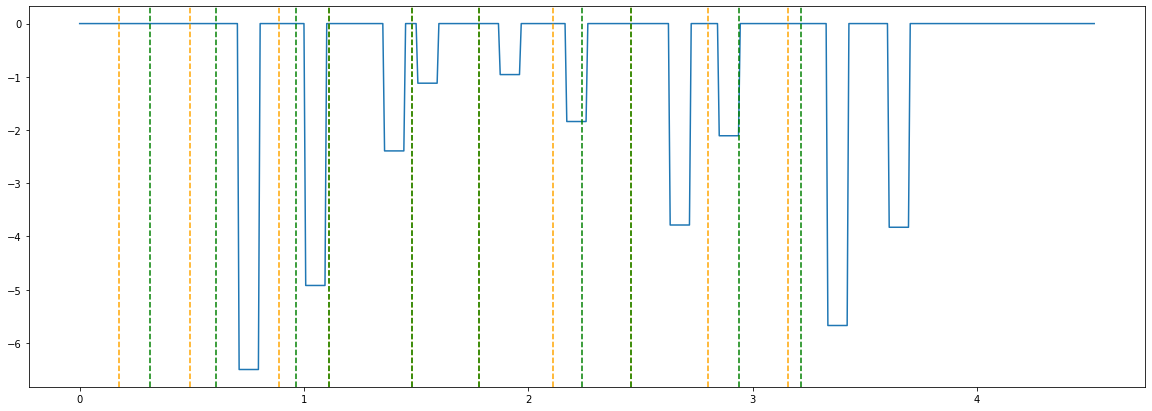

In [114]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.plot(np.arange(ds.Y.shape[0]) / ds.sample_rate, ds.Y[:, 0])

for word_onset in ds.phoneme_onsets[:, 0]:
    ax.axvline(word_onset, c="orange", linestyle="--")
for rec_onset in ds.recognition_onsets:
    ax.axvline(rec_onset, c="green", linestyle="--")